<a href="https://colab.research.google.com/github/laurelkeys/machine-learning/blob/master/assignment-4/Trajectories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import cv2
import gym
import random
import numpy as np
import PIL

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# The 210x160 RGB Atari images are converted to grayscale and downsampled to 84x84
# ref.: https://github.com/hill-a/stable-baselines/blob/master/stable_baselines/common/atari_wrappers.py#L172

# INP_IMAGE_SHAPE = (84, 84)
INP_IMAGE_SHAPE = (210, 160, 3)
INP_IMAGE_SIZE  = np.prod(INP_IMAGE_SHAPE)

In [0]:
# environments used to generate images
ENV_IDS = ["Breakout-v0", "Pong-v0"]

In [0]:
PATH_TO_DATA = os.path.join("drive", "My Drive", "unicamp", "MC886", "atari")
SAVE_DIR = os.path.join(PATH_TO_DATA, "data")

IMAGES_TO_GENERATE = 1000

In [0]:
def save_as_image(observation, save_dir, img_name, prefix="img_", downscale=False):
    # downscaling the image
    if downscale:
        im_array = cv2.resize(observation, INP_IMAGE_SHAPE) # TODO test tf.image.resize
        im = PIL.Image.fromarray(im_array, 'RGB')
    else:
        try:
            im = PIL.Image.fromarray(observation, 'RGB')
        except:
            print(type(observation))
    imname = "{}{}.png".format(prefix, img_name)
    im.save(os.path.join(save_dir, imname))

In [0]:
# you can change the default values here
save_dir = SAVE_DIR
num_images = IMAGES_TO_GENERATE

In [0]:
os.makedirs(save_dir, exist_ok=True)

In [0]:
envs = [gym.make(env_id) for env_id in ENV_IDS]

In [30]:
for env_id, env in zip(ENV_IDS, envs):
    print(env_id)
    env_dir = os.path.join(save_dir, f"{env_id}_{IMAGES_TO_GENERATE}")
    os.makedirs(env_dir, exist_ok=True)
    
    env.reset()
    i, current_env_images = 0, 0
    
    actions_taken = []
    while i < num_images:
        # take a random action (sampled from the action space)
        action = env.action_space.sample()
        actions_taken.append(action)
        assert 0 <= action < 18, f"action = {action}"
        obs, _, done, _ = env.step(action)
        if np.mean(obs) > 0.01:
            save_as_image(obs, env_dir, str(i))
            i += 1
        else:
            print("should I have been reached?")
            continue
        if done:
            print(f"reseting {env_id} at i={i}")
            env.reset()
    
    actions_taken = np.asarray(actions_taken, dtype='int8')
    print(actions_taken.shape, actions_taken.size, actions_taken.dtype)
    np.save(os.path.join(save_dir, f"{env_id}_{IMAGES_TO_GENERATE}_actions"), actions_taken)

Breakout-v0
reseting Breakout-v0 at i=359
reseting Breakout-v0 at i=569
reseting Breakout-v0 at i=809
(1000,) 1000 int8
Pong-v0
(1000,) 1000 int8


In [0]:
# ref.: https://github.com/satwikkansal/atari_gan/blob/master/generate_data.py

In [0]:
# !rm -rf drive/My\ Drive/unicamp/MC886/atari/data/*.png

In [31]:
!ls -U drive/My\ Drive/unicamp/MC886/atari/data/

Breakout-v0_1000	      Pong-v0_1000
Breakout-v0_1000_actions.npy  Pong-v0_1000_actions.npy


In [32]:
!ls -U drive/My\ Drive/unicamp/MC886/atari/data/Breakout-v0_1000/ | head -4

img_0.png
img_2.png
img_3.png
img_4.png


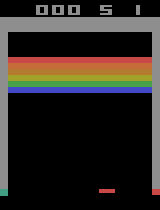

In [38]:
from IPython.display import Image
Image('drive/My Drive/unicamp/MC886/atari/data/Breakout-v0_1000/img_0.png')

In [0]:
# TODO download data/

In [0]:
actions_taken = np.load('drive/My Drive/unicamp/MC886/atari/data/Breakout-v0_1000_actions.npy')

In [40]:
print(actions_taken.shape, actions_taken.size, actions_taken.dtype)

(1000,) 1000 int8


In [41]:
actions_taken[:10]

array([0, 1, 1, 2, 2, 3, 3, 0, 2, 3], dtype=int8)

## Extract image features with [MobileNetV2](https://keras.io/applications/#mobilenetv2)